<a href="https://colab.research.google.com/github/NawinMasterM/Superai_Lv1_ImageProcessing_0.94_accuracy/blob/main/Image_Processing_0.9453_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Processing

# Source For Model
https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/

# MY Code
https://colab.research.google.com/drive/1mxxhZHGg5rv72BoJC-PH6e2dC2_koTgP?usp=sharing

## Library
> Note *Dont Forget to Restart Runtime

**When download matplotlib dont forget to restart runtime**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# All of these library dont for get to restart runtime
# !pip install tensorflow==2.5.0 -qq #for ResNet50

!pip install albumentations -qq

!pip install --upgrade gdown -qq

!pip install matplotlib==3.1.3 -qq

!pip install pillow==9.2.0 -qq

!pip install split-folders[full] -qq

!pip install autocrop

# !pip install numpy==1.21 -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 89.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.0/159.0 KB 15.3 MB/s eta 0:00:00


In [ ]:
#dont forget to Check tensorflow is map your GPU it will happen if your down grade tensorflow
import tensorflow as tf
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5



In [ ]:
#Restart runtime ขก.กด
import os
os.kill(os.getpid(), 9)

In [ ]:
import os
import pandas as pd
from tqdm import tqdm
import numpy as np
import shutil

#augmentation
import albumentations as A

#opencv
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from PIL import Image, ImageOps

#plot
import matplotlib.pyplot as plt
import seaborn as sns

#spli folder
import splitfolders

#Augmentation
from tqdm import tqdm

#Model
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import Model 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

from tensorflow.keras.optimizers import RMSprop, SGD

# from tensorflow.keras.applications.vgg16 import VGG16 #vgg16
# from tensorflow.keras.applications.inception_v3 import InceptionV3 #InceptionV3
from tensorflow.keras.applications import ResNet50, VGG16, InceptionV3, EfficientNetB0, EfficientNetB7

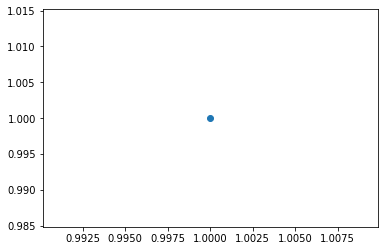

In [ ]:
#test matplotlib
plt.scatter(1, 1)

## Load

In [ ]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                             title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                   480KB  2023-01-04 12:50:31           2249         87  1.0              
thedevastator/global-fossil-co2-emissions-by-country-2002-2022  Emissions by Country, 2002-2022              621KB  2023-01-02 20:10:36           1216         45  1.0              
die9origephit/fifa-world-cup-2022-complete-dataset              Fifa World Cup 2022: Complete Dataset          7KB  2022-12-18 22:51:11           5611        179  1.0              
rakkesharv/spotify-top-10000-streamed-songs                     Spotify Top 10000 Streamed Song

In [ ]:
!kaggle competitions download -c hackathon-online-2022-image-processing
!unzip -q hackathon-online-2022-image-processing

 96% 400M/415M [00:04<00:00, 157MB/s]
100% 415M/415M [00:04<00:00, 100MB/s]


In [ ]:
!unzip /content/IM_Test.zipfile
!unzip /content/IM_Train.zipfile

Archive:  /content/IM_Test.zipfile
replace IM_Test.zipfile? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: IM_Test.zipfile         
Archive:  /content/IM_Train.zipfile
replace IM_Train.zipfile? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: IM_Train.zipfile        


In [ ]:
!rm -rf /content/IM_Test
!rm -rf /content/IM_test_bbox
!rm -rf /content/train
!rm -rf /content/train_val
!rm -rf /content/train_val_aug
!rm -rf /content/train_clean

In [ ]:
!rm -rf /content/IM_test_bbox.zip
!rm -rf /content/train_val_aug.zip
!rm -rf /content/df_test.csv

In [ ]:
!unzip -q /content/IM_Test.zipfile
!unzip -q /content/IM_Train.zipfile

## Read

In [ ]:
df_test = pd.read_csv('/content/IM_Submit.csv')
json_test = pd.read_json('/content/IM_Test/IM_Test.json')
df_test

,imageid_boxid,class
0,1_0,NaN
1,2_0,NaN
2,2_1,NaN
3,2_2,NaN
4,3_0,NaN
...,...,...
26027,13067_0,NaN
26028,13067_1,NaN
26029,13067_2,NaN
26030,13068_0,NaN


In [ ]:
json_test

,filename,bboxes
0,1.png,"[{'bbox_id': 0, 'x1': 43, 'x2': 62, 'y1': 7, '..."
1,2.png,"[{'bbox_id': 0, 'x1': 99, 'x2': 113, 'y1': 5, ..."
2,3.png,"[{'bbox_id': 0, 'x1': 61, 'x2': 72, 'y1': 6, '..."
3,4.png,"[{'bbox_id': 0, 'x1': 32, 'x2': 46, 'y1': 6, '..."
4,5.png,"[{'bbox_id': 0, 'x1': 97, 'x2': 116, 'y1': 28,..."
...,...,...
13063,13064.png,"[{'bbox_id': 0, 'x1': 227, 'x2': 249, 'y1': 43..."
13064,13065.png,"[{'bbox_id': 0, 'x1': 67, 'x2': 82, 'y1': 14, ..."
13065,13066.png,"[{'bbox_id': 0, 'x1': 33, 'x2': 45, 'y1': 19, ..."
13066,13067.png,"[{'bbox_id': 0, 'x1': 113, 'x2': 126, 'y1': 14..."


**RAM เต็ม**

In [ ]:
# # ram เต็มเลยใช้วิธีนี้ไม่ได้
# from tqdm import tqdm
# file_name, x1, x2, y1, y2 = [], [], [], [], []
# for i in tqdm(json_test['filename']):
#   for j in json_test['bboxes']:
#     for k in j:
#       file_name.append(i)
#       x1.append(k['x1'])
#       x2.append(k['x2'])
#       y1.append(k['y1'])
#       y2.append(k['y2'])
# df_test['file_name'] = file_name
# df_test['x1'] = x1
# df_test['x2'] = x2
# df_test['y1'] = y1
# df_test['y2'] = y2

**ลองวิธีนี้แทน**

In [ ]:
df_test['imageid_boxid'].str.split('_', n = 1, expand = True)[0]

0            1
1            2
2            2
3            2
4            3
         ...  
26027    13067
26028    13067
26029    13067
26030    13068
26031    13068
Name: 0, Length: 26032, dtype: object

**ผลลัพธ์ที่ได้ไม่กินแรมเลย ใช้เสร็จก็คืนแรม และ Run เร็วแบบเห็นได้ชัด**

In [ ]:
#get file_name
lis1 = df_test['imageid_boxid'].str.split('_',n = 1, expand = True)[0]
lis2 = [i+'.png' for i in lis1]
df_test['file_name'] = lis2

#get bboxes
idx = 0
for i in tqdm(json_test['bboxes']):
  for dic in i:
    box = [dic['x1'], dic['x2'], dic['y1'], dic['y2']]
    df_test.loc[idx, ['x1', 'x2', 'y1', 'y2']] = box
    idx += 1
df_test.head()

100%|██████████| 13068/13068 [00:48<00:00, 269.26it/s]


,imageid_boxid,class,file_name,x1,x2,y1,y2
0,1_0,NaN,1.png,43.0,62.0,7.0,37.0
1,2_0,NaN,2.png,99.0,113.0,5.0,28.0
2,2_1,NaN,2.png,114.0,122.0,8.0,31.0
3,2_2,NaN,2.png,121.0,133.0,6.0,29.0
4,3_0,NaN,3.png,61.0,72.0,6.0,22.0


## bbox df_test

In [ ]:
#change to int for bbox float not accept
df_test[['x1', 'x2', 'y1', 'y2']] = df_test[['x1', 'x2', 'y1', 'y2']].astype(int)

In [ ]:
# ! rm -rf /content/IM_test_bbox #force to remove folder
!mkdir IM_test_bbox

In [ ]:
for idx, row in tqdm(df_test.iterrows()):
  img = cv2.imread('/content/IM_Test/IM_Test/'+ row['file_name'])
  file_name = row['imageid_boxid']
  cv2.imwrite(f'/content/IM_test_bbox/{file_name}.png',img[row['y1']:row['y2'], row['x1']:row['x2']]) #เก็บ image test เข้า folder
  df_test.loc[idx, 'file_name'] = f'/content/IM_test_bbox/{file_name}.png'

26032it [01:25, 306.18it/s]


In [ ]:
df_test.to_csv('df_test.csv', index=False)
df_test

,imageid_boxid,class,file_name,x1,x2,y1,y2
0,1_0,NaN,/content/IM_test_bbox/1_0.png,43,62,7,37
1,2_0,NaN,/content/IM_test_bbox/2_0.png,99,113,5,28
2,2_1,NaN,/content/IM_test_bbox/2_1.png,114,122,8,31
3,2_2,NaN,/content/IM_test_bbox/2_2.png,121,133,6,29
4,3_0,NaN,/content/IM_test_bbox/3_0.png,61,72,6,22
...,...,...,...,...,...,...,...
26027,13067_0,NaN,/content/IM_test_bbox/13067_0.png,113,126,14,34
26028,13067_1,NaN,/content/IM_test_bbox/13067_1.png,124,137,14,34
26029,13067_2,NaN,/content/IM_test_bbox/13067_2.png,133,149,13,33
26030,13068_0,NaN,/content/IM_test_bbox/13068_0.png,36,47,9,31


## Clean

In [ ]:
digit, count = [], []
for i in os.listdir('/content/train'):
  digit.append(i)
  count.append(len(os.listdir('/content/train/'+i)))

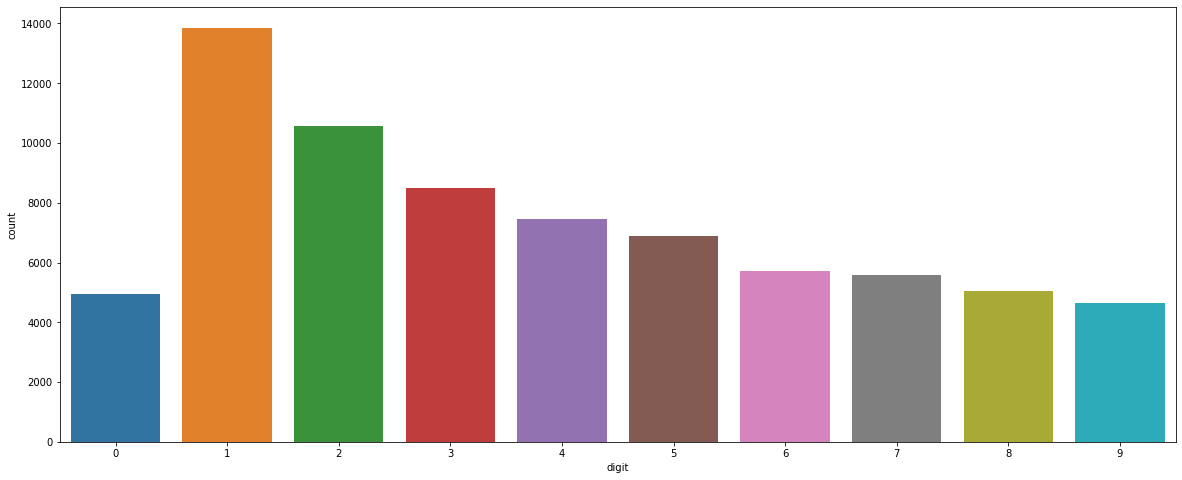

In [ ]:
df = pd.DataFrame({
    'digit':digit,
    'count':count
})
df.sort_values(by='digit', inplace=True)
plt.figure(figsize=(20, 8));
sns.barplot(data=df,x='digit', y='count');

**Clean**
> เพราะบางรูปใน train มันมีหลายเลข แต่ label มีได้แค่เลขเดียว

In [ ]:
!rm -rf /content/train_clean
!cp -r /content/train /content/train_clean

**Distribute of Train Data**

100%|██████████| 10/10 [00:05<00:00,  1.69it/s]


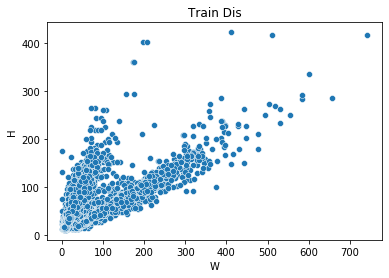

In [ ]:
#เช็คการกระจายตัวของ train data
W,H = [],[]
base = '/content/train'

for i in tqdm(os.listdir(base)):
  dir = os.path.join(base, i)
  for j in os.listdir(dir):
    img_path = os.path.join(dir, j)
    img = cv2.imread(img_path)
    h,w,c=img.shape
    W.append(w)
    H.append(h)
data=pd.DataFrame({'W': W,'H': H})
plt.title('Train Dis')
sns.scatterplot(data=data, x="W", y="H");

**Distribute of Test Data**

100%|██████████| 26032/26032 [00:01<00:00, 13490.14it/s]


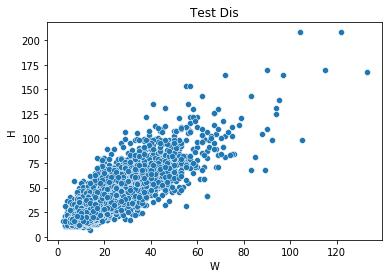

In [ ]:
#เช็คการกระจายของ test data
WW, HH = [], []
base = '/content/IM_test_bbox'
for i in tqdm(os.listdir(base)):
  img_path = os.path.join(base, i)
  img = cv2.imread(img_path)
  h,w,c=img.shape
  WW.append(w)
  HH.append(h)
data=pd.DataFrame({'W': WW,'H': HH})
plt.title('Test Dis')
sns.scatterplot(data=data, x="W", y="H",);

**Remove bad image**
> train data มีลักษณะการกระจายตัว ไม่เหมือนของ test แสดงว่ามีหลุมดักอยู่

In [ ]:
base = '/content/IM_test_bbox'
h_w = []
w_h = []
for i in tqdm(os.listdir(base)):
  img_path = os.path.join(base, i)
  img = cv2.imread(img_path)
  h, w, c = img.shape
  hw = h/w
  wh = w/h
  h_w.append(hw)
  w_h.append(wh)
w_h.sort()
h_w.sort()
print()
print(f'min h_w {h_w[0]} mean {np.mean(h_w)} median {np.median(h_w)} max {h_w[-1]}')
print(f'min w_h {w_h[0]} mean {np.mean(w_h)} median {np.median(w_h)}  max {w_h[-1]}')

100%|██████████| 26032/26032 [00:01<00:00, 16207.50it/s]


min h_w 0.5 mean 1.9109812720049117 median 1.793103448275862 max 10.333333333333334
min w_h 0.0967741935483871 mean 0.5614807298936207 median 0.5576923076923077  max 2.0


In [ ]:
#remove bad image
base = '/content/train_clean'
for i in tqdm(os.listdir(base)):
  dir = os.path.join(base, i)
  for j in os.listdir(dir):
    img_path = os.path.join(dir, j)
    img = cv2.imread(img_path)
    h,w,c=img.shape
    hw = h/w
    wh = w/h

    # #remove bad image
    if (w > (0.9*h)) or (w < (0.2*h)): #number w chose less than h
      os.remove(img_path)

100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


100%|██████████| 10/10 [00:04<00:00,  2.19it/s]


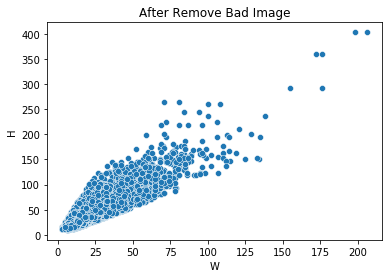

In [ ]:
#check distribution after remove bad img
W,H = [],[]
base = '/content/train_clean'

for i in tqdm(os.listdir(base)):
  dir = os.path.join(base, i)
  for j in os.listdir(dir):
    img_path = os.path.join(dir, j)
    img = cv2.imread(img_path)
    h,w,c=img.shape
    W.append(w)
    H.append(h)
data=pd.DataFrame({'W': W,'H': H})
plt.title('After Remove Bad Image')
sns.scatterplot(data=data, x="W", y="H");

## Crop image for easy prediction

In [ ]:
img = cv2.imread('/content/train_clean/1/21610.0.png')

In [ ]:
base = '/content/train_clean'
lis = os.listdir(base)
num = 0
num2 = 0
for i in tqdm(lis):
  count = 0
  dir = os.path.join(base, i)
  lis = os.listdir(dir)
  for j in lis:

    img_path = os.path.join(dir, j)
    image = Image.open(img_path)
    image = ImageOps.contain(image, (224, 224) , Image.Resampling.LANCZOS) #เกลี่ยสี
    image = ImageOps.autocontrast(image) #สีเข้มขึ้น
    image = ImageOps.grayscale(image) #grayscale
    image = ImageOps.autocontrast(image) #สีเข้มขึ้น
    image = np.array(image)
    image = cv2.resize(image, (224, 224))
    
    #for black digit
    ret, thresh = cv2.threshold(image.copy(), 125, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #for white digit
    grey_invert = np.array(ImageOps.invert(Image.fromarray(image.copy()))) #เปลี่ยนขาวเป็นดำ ดำเป็นขาว
    ret2, thresh2 = cv2.threshold(grey_invert.copy(), 125, 255, cv2.THRESH_BINARY_INV)
    # ret2, thresh2 = cv2.threshold(grey_invert.copy(), 75, 255, cv2.THRESH_BINARY_INV)
    contours2, _ = cv2.findContours(thresh2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if (len(contours) == 1): #รูปใหม่ต้องเล็กกว่ารูปเก่าไม่เกิน 40%
      for c in contours:
        x,y,w,h = cv2.boundingRect(c)

        # Cropping out the digit from the image corresponding to the current contours in the for loop
        img = image[y:y+h, x:x+w].copy()

      if (img.size > (0.4*image.size)):
        img = cv2.resize(img, (224, 224))
        cv2.imwrite(img_path, img)
        num += 1

    elif (len(contours2) == 1): #รูปใหม่ต้องเล็กกว่ารูปเก่าไม่เกิน 40%
      for c in contours2:
        x,y,w,h = cv2.boundingRect(c)

        # Cropping out the digit from the image corresponding to the current contours in the for loop
        img = image[y:y+h, x:x+w].copy()

      if (img.size > (0.4*image.size)):
        img = cv2.resize(img, (224, 224))
        cv2.imwrite(img_path, img)
        num += 1

    else:
      cv2.imwrite(img_path, image)
      num2 += 1

100%|██████████| 10/10 [04:20<00:00, 26.01s/it]


In [ ]:
#num == crop

In [ ]:
#new
print(f'num {num}, num2 {num2}')

num 50249, num2 15703


In [ ]:
print(f'num {num}, num2 {num2}')

In [ ]:
base = '/content/IM_test_bbox'
num = 0
num2 = 0
lis = os.listdir(base)
for i in tqdm(lis):

  img_path = os.path.join(base, i)
  image = Image.open(img_path)
  image = ImageOps.contain(image, (224, 224) , Image.Resampling.LANCZOS) #เกลี่ยสี
  image = ImageOps.autocontrast(image) #สีเข้มขึ้น
  image = ImageOps.grayscale(image) #grayscale
  image = ImageOps.autocontrast(image) #สีเข้มขึ้น
  image = np.array(image)
  image = cv2.resize(image, (224, 224))

  #for black digit
  ret, thresh = cv2.threshold(image.copy(), 125, 255, cv2.THRESH_BINARY_INV)
  contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  #for white digit
  grey_invert = np.array(ImageOps.invert(Image.fromarray(image.copy()))) #เปลี่ยนขาวเป็นดำ ดำเป็นขาว
  ret2, thresh2 = cv2.threshold(grey_invert.copy(), 125, 255, cv2.THRESH_BINARY_INV)
  contours2, _ = cv2.findContours(thresh2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  if (len(contours) == 1): #รูปใหม่ต้องเล็กกว่ารูปเก่าไม่เกิน 40%
    for c in contours:
      x,y,w,h = cv2.boundingRect(c)

      # Cropping out the digit from the image corresponding to the current contours in the for loop
      img = image[y:y+h, x:x+w].copy()

    if (img.size > (0.4*image.size)):
      img = cv2.resize(img, (224, 224))
      cv2.imwrite(img_path, img)
      num += 1

  elif (len(contours2) == 1): #รูปใหม่ต้องเล็กกว่ารูปเก่าไม่เกิน 40%
    for c in contours2:
      x,y,w,h = cv2.boundingRect(c)

      # Cropping out the digit from the image corresponding to the current contours in the for loop
      img = image[y:y+h, x:x+w].copy()

    if (img.size > (0.4*image.size)):
      img = cv2.resize(img, (224, 224))
      cv2.imwrite(img_path, img)
      num += 1

  else:
    cv2.imwrite(img_path, image)
    num2 += 1

100%|██████████| 26032/26032 [01:47<00:00, 241.49it/s]


In [ ]:
print(f'num {num}, num2 {num2}')

num 20825, num2 3979


**หลังจาก clean แล้วรูปเหลือเท่าไหร่**

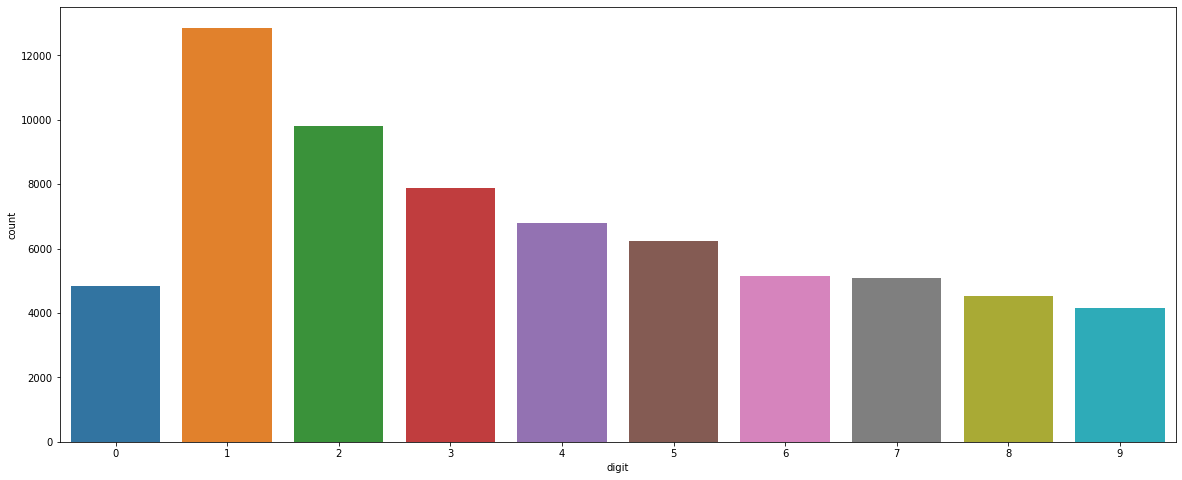

In [ ]:
digit, count = [], []
for i in os.listdir('/content/train_clean'):
  digit.append(i)
  count.append(len(os.listdir('/content/train_clean/'+i)))

df = pd.DataFrame({
    'digit':digit,
    'count':count
})
df.sort_values(by='digit', inplace=True)
plt.figure(figsize=(20, 8));
sns.barplot(data=df,x='digit', y='count');

In [ ]:
max(df['count'])

12863

## Augmentation
> - Add noise
- Rotate

**Split folder for Train 80 Val 20**

In [ ]:
splitfolders.ratio("/content/train_clean/", output="train_val",seed =1337, ratio=(.80, .20), group_prefix=None, move=False)

Copying files: 67387 files [00:18, 3559.95 files/s]


In [ ]:
!rm -rf /content/train_val_aug
!cp -r /content/train_val /content/train_val_aug

**Augment only Train**

In [ ]:
df_test = pd.read_csv('df_test.csv')

In [ ]:
transform = A.Compose([
    # A.ShiftScaleRotate(she, rotate_limit=20),
    A.ShiftScaleRotate(rotate_limit=20),
    # A.RandomCrop(width=212, height=212),
])

base = '/content/train_val_aug/train'
max_len = 13000
for i in tqdm(os.listdir(base)):
  dir = os.path.join(base, i)
  lis = os.listdir(dir)
  for j in lis:

    #rotate
    if len(os.listdir(dir)) < max_len:
      img_path = os.path.join(dir, j)
      img = cv2.imread(img_path)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

      for i in range(5):
        path_new = img_path[:-4] + f'_rotate_{i}.png'
        transformed = transform(image=img)['image']
        while ((img == transformed).all()):
          transformed = transform(image=img)['image']
        transformed = cv2.cvtColor(transformed, cv2.COLOR_RGB2BGR)
        cv2.imwrite(path_new, transformed)
    else:
      break

100%|██████████| 10/10 [06:19<00:00, 37.98s/it]


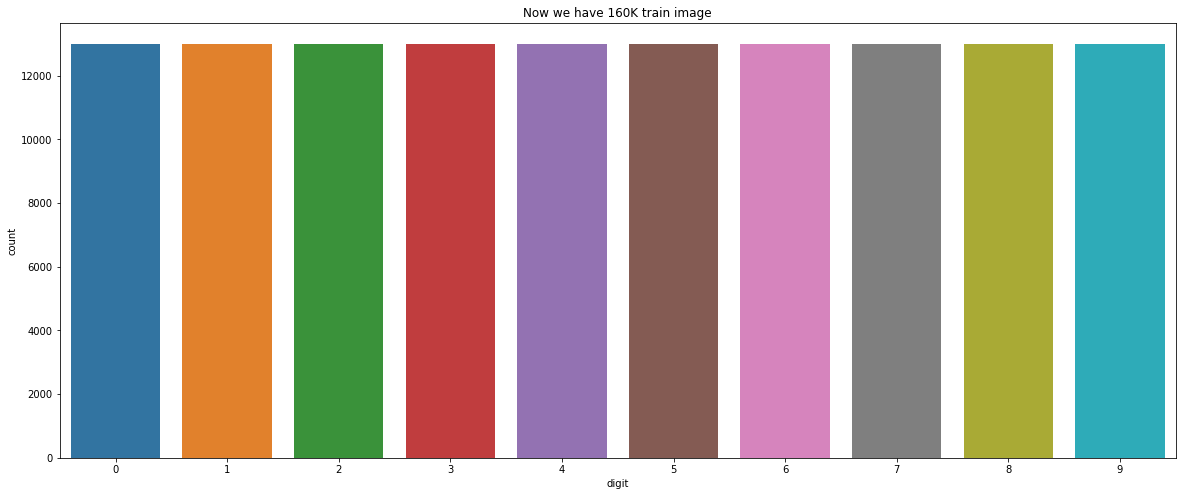

In [ ]:
digit, count = [], []
for i in os.listdir('/content/train_val_aug/train'):
  digit.append(i)
  count.append(len(os.listdir('/content/train_val_aug/train/'+i)))
  

df = pd.DataFrame({
    'digit':digit,
    'count':count
})
df.sort_values(by='digit', inplace=True)
plt.figure(figsize=(20, 8));
plt.title('Now we have 160K train image')
sns.barplot(data=df,x='digit', y='count');

## Change Trian, Validation and Test To GraySacle
> In Train dataset Choose Change Black to White and White to Black for more Image

**Train & Validation to GrayScale**

In [ ]:
base = '/content/train_val_aug'
for i in os.listdir(base):
  dir = os.path.join(base, i)
  for j in tqdm(os.listdir(dir)):
    dir2 = os.path.join(dir, j)
    lis = os.listdir(dir2)
    for k in lis: #เข้าถึงรูป 1 รูป ในกลุ่มของเลขนั้นๆ
      img_path = os.path.join(dir2, k)
      if '_inverted' in img_path:
        print(img_path)
        os.remove(img_path)

100%|██████████| 10/10 [00:00<00:00, 14.57it/s]

/content/train_val_aug/train/9/23145.0_rotate_1_inverted.png


In [ ]:
os.remove('/content/train_val_aug/val/1/16492.0.png')

In [ ]:
base = '/content/train_val_aug/train'
for i in tqdm(os.listdir(base)):
  dir = os.path.join(base, i)
  lis = os.listdir(dir)
  for j in lis:
    img_path = os.path.join(dir, j)
    img = Image.open(img_path)
    inverted = ImageOps.invert(img)
    inverted.save(img_path[:-4]+'_inverted.png')

100%|██████████| 10/10 [25:33<00:00, 153.36s/it]


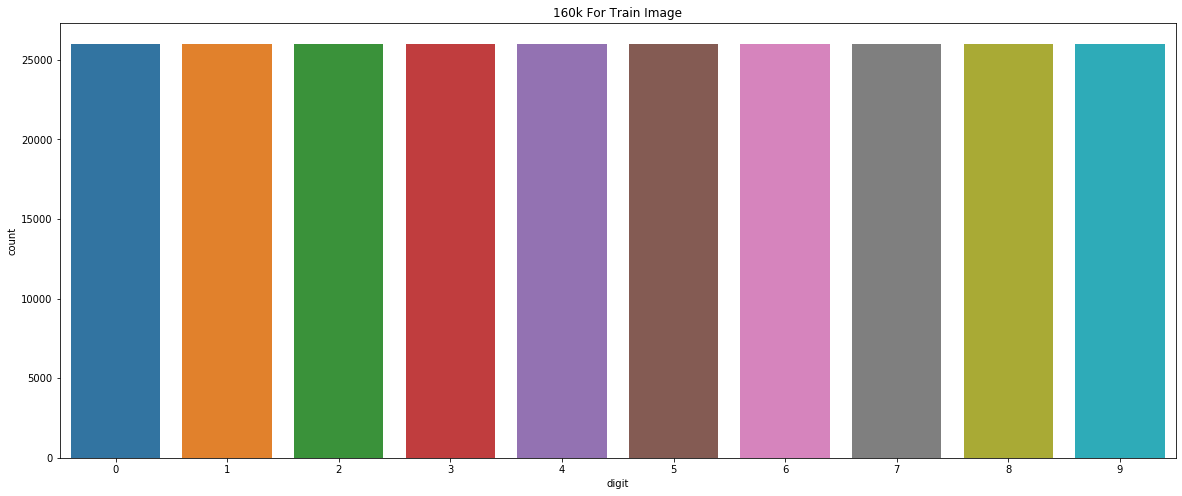

In [ ]:
digit, count = [], []
for i in os.listdir('/content/train_val_aug/train'):
  digit.append(i)
  count.append(len(os.listdir('/content/train_val_aug/train/'+i)))
  

df = pd.DataFrame({
    'digit':digit,
    'count':count
})
df.sort_values(by='digit', inplace=True)
plt.figure(figsize=(20, 8));
plt.title('160k For Train Image')
sns.barplot(data=df,x='digit', y='count');

**Test to Gray Scale**

In [ ]:
# base = '/content/IM_test_bbox'
# lis = os.listdir(base)
# for i in tqdm(lis):
#   img_path = os.path.join(base, i)
#   img = Image.open(img_path)

#   img = ImageOps.contain(img, (224, 224) , Image.Resampling.LANCZOS) #เกลี่ยสี
#   img = ImageOps.autocontrast(img) #สีเข้มขึ้น
#   img = ImageOps.grayscale(img) #grayscale
#   img = ImageOps.autocontrast(img) #สีเข้มขึ้น
#   # img = ImageOps.pad(img, ((224, 224)) , centering=(0, 0))
#   img.save(img_path)

In [ ]:
base = '/content/train_val_aug/train/5'
c = 0
for i in os.listdir(base):
  img_path = os.path.join(base, i)
  img = cv2.imread(img_path)
  cv2_imshow(img)
  c += 1
  if c == 10:
    break

## Save All File to Colab

In [ ]:
!cp -r /content/train_val_aug commy_test

In [ ]:
#df_test
df_test.to_csv('/content/drive/MyDrive/Colab Notebooks/SuperAi/Pracetice/Image Processing Hack1/df_test.csv', index=False)

#Image_test
!zip -r -q '/content/drive/MyDrive/Colab Notebooks/SuperAi/Pracetice/Image Processing Hack1/IM_test_bbox.zip' /content/IM_test_bbox

#Image_Train_Validation
!zip -r -q '/content/drive/MyDrive/Colab Notebooks/SuperAi/Pracetice/Image Processing Hack1/train_val_aug.zip' /content/train_val_aug

## **Trainmodel**
- VGG-16
- ResNet50
- Inceptionv3
- EfficientNet

### **Load All File**

In [ ]:
#df_test
!gdown 1aEyrD65pZw0YQzVTyrVUqzexMhaerh7_

#Image Test
!gdown 1-0CCA7pyxUKkiGcN7cewwubSkUDGtl7k

#Image Train & Validation
!gdown 1-1QK5ADhQCZxmD-8-22CZHo7QQ7VD_fk

Downloading...
From: https://drive.google.com/uc?id=1aEyrD65pZw0YQzVTyrVUqzexMhaerh7_
To: /content/df_test.csv
100% 1.40M/1.40M [00:00<00:00, 151MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-0CCA7pyxUKkiGcN7cewwubSkUDGtl7k
To: /content/IM_test_bbox.zip
100% 405M/405M [00:06<00:00, 61.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-1QK5ADhQCZxmD-8-22CZHo7QQ7VD_fk
To: /content/train_val_aug.zip
100% 5.50G/5.50G [01:10<00:00, 78.1MB/s]


In [ ]:
!unzip -q /content/train_val_aug.zip
!unzip -q /content/IM_test_bbox.zip

In [ ]:
#move file
    
source_dir = '/content/content'
target_dir = '/content/'
    
file_names = os.listdir(source_dir)
    
for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)

!rm -rf /content/content

df_test = pd.read_csv('df_test.csv')
df_test.head()

,imageid_boxid,class,file_name,x1,x2,y1,y2
0,1_0,NaN,/content/IM_test_bbox/1_0.png,43,62,7,37
1,2_0,NaN,/content/IM_test_bbox/2_0.png,99,113,5,28
2,2_1,NaN,/content/IM_test_bbox/2_1.png,114,122,8,31
3,2_2,NaN,/content/IM_test_bbox/2_2.png,121,133,6,29
4,3_0,NaN,/content/IM_test_bbox/3_0.png,61,72,6,22


In [ ]:
df_test = pd.read_csv('df_test.csv')
df_test.head()

,imageid_boxid,class,file_name,x1,x2,y1,y2
0,1_0,NaN,/content/IM_test_bbox/1_0.png,43,62,7,37
1,2_0,NaN,/content/IM_test_bbox/2_0.png,99,113,5,28
2,2_1,NaN,/content/IM_test_bbox/2_1.png,114,122,8,31
3,2_2,NaN,/content/IM_test_bbox/2_2.png,121,133,6,29
4,3_0,NaN,/content/IM_test_bbox/3_0.png,61,72,6,22


### VGG16 94.53%

In [ ]:
base_dir = 'train_val_aug'
train_dir = os.path.join(base_dir, 'train') #resulf = directory
validation_dir = os.path.join(base_dir, 'val')



```
test ถูกจัดการ ด้วย flow_from_dataframe ใน step 2 ข้างล่าง
```



**Step 1: Image Augmentation (แอบทำมาก่อนแล้ว อันนี้เลยแค่ rescale)**
>Since we took up a much smaller dataset of images earlier, we can make up for it by augmenting this data and increasing our dataset size. If you are working with the original larger dataset, you can skip this step and move straight on to building the model.

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1.0/255.)
# train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

**Step 2: Training and Validation Sets**

In [ ]:
# Train Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'sparse', target_size = (224, 224))

# Validation Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir,  batch_size = 20, class_mode = 'sparse', target_size = (224, 224))

# Test use flow from dataframe เพราะ เวลาส่งชื่อต้องเรียงตาม format เขา
test_generator = test_datagen.flow_from_dataframe(df_test, x_col='file_name', batch_size = 20, class_mode = None, target_size = (224, 224), shuffle=False)

Found 260042 images belonging to 10 classes.
Found 13480 images belonging to 10 classes.
Found 26032 validated image filenames.


**Step 3: Loading the Base Model**
> We will be using only the basic models, with changes made only to the final layer. This is because this is just a binary classification problem while these models are built to handle up to 1000 classes.

In [ ]:
base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

**Since we don’t have to train all the layers, we make them non_trainable:**
> กูเข้าใจว่ามันคือ Freezing เข้าถูกแล้ว

In [ ]:
# Freeze the base model
base_model.trainable = False

**Step 4: Compile and Fit**
>We will then build the last fully-connected layer. I have just used the basic settings, but feel free to experiment with different values of dropout, and different Optimisers and activation functions.

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.4)(x)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.4)(x)

# Add a final sigmoid layer with ... node for classification output
x = layers.Dense(10, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

#อย่าลืมเปลี่ยน loss ให้เหมาะกับงาน แต่คิดว่าแค่ตัวนี้ก็เพียงพอ
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'sparse_categorical_crossentropy',metrics = ['acc'])

We will now build the final model based on the training and validation sets we created earlier. Please note to use the original directories itself instead of the augmented datasets I have used below. I have used just 10 epochs, but you can also increase them to get better results:

**Note: Use GPU Dont Forget Commy**

In [ ]:
#เอาไว้เก็บ best_model
!rm -rf 'vgg16_best'

checkpoint = ModelCheckpoint("vgg16_best", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=2, verbose=1, mode='max') #2 ตัวไม่ดีขึ้นก็หยุด
vgghist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 1000, callbacks=[checkpoint,early])

Epoch 1/1000
100/100 [==============================] - ETA: 0s - loss: 2.3725 - acc: 0.1245
Epoch 1: val_acc improved from -inf to 0.26840, saving model to vgg16_best


100/100 [==============================] - 101s 913ms/step - loss: 2.3725 - acc: 0.1245 - val_loss: 2.1800 - val_acc: 0.2684
Epoch 2/1000
100/100 [==============================] - ETA: 0s - loss: 2.2175 - acc: 0.1725
Epoch 2: val_acc did not improve from 0.26840
100/100 [==============================] - 90s 902ms/step - loss: 2.2175 - acc: 0.1725 - val_loss: 2.1510 - val_acc: 0.1881
Epoch 3/1000
100/100 [==============================] - ETA: 0s - loss: 2.1678 - acc: 0.2130
Epoch 3: val_acc improved from 0.26840 to 0.40942, saving model to vgg16_best


100/100 [==============================] - 94s 949ms/step - loss: 2.1678 - acc: 0.2130 - val_loss: 1.9404 - val_acc: 0.4094
Epoch 4/1000
100/100 [==============================] - ETA: 0s - loss: 2.0460 - acc: 0.2760
Epoch 4: val_acc did not improve from 0.40942
100/100 [==============================] - 92s 922ms/step - loss: 2.0460 - acc: 0.2760 - val_loss: 1.9143 - val_acc: 0.2868
Epoch 5/1000
100/100 [==============================] - ETA: 0s - loss: 1.9693 - acc: 0.2990
Epoch 5: val_acc improved from 0.40942 to 0.51513, saving model to vgg16_best


100/100 [==============================] - 94s 947ms/step - loss: 1.9693 - acc: 0.2990 - val_loss: 1.7530 - val_acc: 0.5151
Epoch 6/1000
100/100 [==============================] - ETA: 0s - loss: 1.9042 - acc: 0.3285
Epoch 6: val_acc did not improve from 0.51513
100/100 [==============================] - 91s 920ms/step - loss: 1.9042 - acc: 0.3285 - val_loss: 1.6466 - val_acc: 0.4579
Epoch 7/1000
100/100 [==============================] - ETA: 0s - loss: 1.8373 - acc: 0.3580
Epoch 7: val_acc improved from 0.51513 to 0.53739, saving model to vgg16_best


100/100 [==============================] - 94s 951ms/step - loss: 1.8373 - acc: 0.3580 - val_loss: 1.5405 - val_acc: 0.5374
Epoch 8/1000
100/100 [==============================] - ETA: 0s - loss: 1.7577 - acc: 0.3745
Epoch 8: val_acc improved from 0.53739 to 0.55156, saving model to vgg16_best


100/100 [==============================] - 94s 948ms/step - loss: 1.7577 - acc: 0.3745 - val_loss: 1.5015 - val_acc: 0.5516
Epoch 9/1000
100/100 [==============================] - ETA: 0s - loss: 1.6895 - acc: 0.4085
Epoch 9: val_acc improved from 0.55156 to 0.56016, saving model to vgg16_best


100/100 [==============================] - 94s 950ms/step - loss: 1.6895 - acc: 0.4085 - val_loss: 1.4495 - val_acc: 0.5602
Epoch 10/1000
100/100 [==============================] - ETA: 0s - loss: 1.6334 - acc: 0.4335
Epoch 10: val_acc improved from 0.56016 to 0.59251, saving model to vgg16_best


100/100 [==============================] - 94s 942ms/step - loss: 1.6334 - acc: 0.4335 - val_loss: 1.3366 - val_acc: 0.5925
Epoch 11/1000
100/100 [==============================] - ETA: 0s - loss: 1.6055 - acc: 0.4530
Epoch 11: val_acc improved from 0.59251 to 0.59859, saving model to vgg16_best


100/100 [==============================] - 92s 931ms/step - loss: 1.6055 - acc: 0.4530 - val_loss: 1.3488 - val_acc: 0.5986
Epoch 12/1000
100/100 [==============================] - ETA: 0s - loss: 1.5157 - acc: 0.4815
Epoch 12: val_acc did not improve from 0.59859
100/100 [==============================] - 91s 916ms/step - loss: 1.5157 - acc: 0.4815 - val_loss: 1.3901 - val_acc: 0.5277
Epoch 13/1000
100/100 [==============================] - ETA: 0s - loss: 1.5442 - acc: 0.4775
Epoch 13: val_acc did not improve from 0.59859
100/100 [==============================] - 92s 925ms/step - loss: 1.5442 - acc: 0.4775 - val_loss: 1.2665 - val_acc: 0.5954
Epoch 13: early stopping


**Load Best Model**

In [ ]:
model_best = keras.models.load_model('/content/vgg16_best')

pred = model_best.predict(test_generator)
pred = np.argmax(pred, axis=1)

sub = df_test[['imageid_boxid', 'class']].copy()
sub['class'] = pred
sub.to_csv('VGG16.csv', index=False)
!kaggle competitions submit -c hackathon-online-2022-image-processing -f 'VGG16.csv'  -m 'VGG16.csv'

1302/1302 [==============================] - 153s 118ms/step
100% 233k/233k [00:02<00:00, 87.2kB/s]
Successfully submitted to Hackathon Online: Image Processing

**Before finetune**
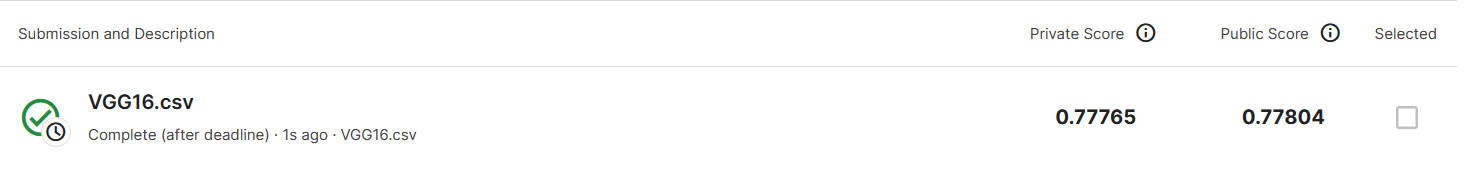

**Finetune**

In [ ]:
# Unfreeze the base model
base_model.trainable = True

#Everytime you Unfreeze call compile please
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'sparse_categorical_crossentropy',metrics = ['acc'])

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='max') #5 ตัวไม่ดีขึ้นก็หยุด
vgghist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 1000, callbacks=[checkpoint,early])

Epoch 1/1000


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


100/100 [==============================] - ETA: 0s - loss: 2.3700 - acc: 0.1440
Epoch 1: val_acc did not improve from 0.59859
100/100 [==============================] - 117s 1s/step - loss: 2.3700 - acc: 0.1440 - val_loss: 2.1572 - val_acc: 0.2729
Epoch 2/1000
100/100 [==============================] - ETA: 0s - loss: 1.6025 - acc: 0.4510
Epoch 2: val_acc improved from 0.59859 to 0.71098, saving model to vgg16_best


100/100 [==============================] - 114s 1s/step - loss: 1.6025 - acc: 0.4510 - val_loss: 0.9148 - val_acc: 0.7110
Epoch 3/1000
100/100 [==============================] - ETA: 0s - loss: 1.0992 - acc: 0.6425
Epoch 3: val_acc improved from 0.71098 to 0.74525, saving model to vgg16_best


100/100 [==============================] - 114s 1s/step - loss: 1.0992 - acc: 0.6425 - val_loss: 0.8308 - val_acc: 0.7453
Epoch 4/1000
100/100 [==============================] - ETA: 0s - loss: 0.9429 - acc: 0.6915
Epoch 4: val_acc improved from 0.74525 to 0.78724, saving model to vgg16_best


100/100 [==============================] - 114s 1s/step - loss: 0.9429 - acc: 0.6915 - val_loss: 0.6880 - val_acc: 0.7872
Epoch 5/1000
100/100 [==============================] - ETA: 0s - loss: 0.8762 - acc: 0.7245
Epoch 5: val_acc improved from 0.78724 to 0.82582, saving model to vgg16_best


100/100 [==============================] - 114s 1s/step - loss: 0.8762 - acc: 0.7245 - val_loss: 0.5738 - val_acc: 0.8258
Epoch 6/1000
100/100 [==============================] - ETA: 0s - loss: 0.8270 - acc: 0.7390
Epoch 6: val_acc improved from 0.82582 to 0.83116, saving model to vgg16_best


100/100 [==============================] - 114s 1s/step - loss: 0.8270 - acc: 0.7390 - val_loss: 0.5511 - val_acc: 0.8312
Epoch 7/1000
100/100 [==============================] - ETA: 0s - loss: 0.7617 - acc: 0.7640
Epoch 7: val_acc did not improve from 0.83116
100/100 [==============================] - 112s 1s/step - loss: 0.7617 - acc: 0.7640 - val_loss: 0.6058 - val_acc: 0.8172
Epoch 8/1000
100/100 [==============================] - ETA: 0s - loss: 0.7090 - acc: 0.7805
Epoch 8: val_acc improved from 0.83116 to 0.84792, saving model to vgg16_best


100/100 [==============================] - 114s 1s/step - loss: 0.7090 - acc: 0.7805 - val_loss: 0.5217 - val_acc: 0.8479
Epoch 9/1000
100/100 [==============================] - ETA: 0s - loss: 0.6647 - acc: 0.8025
Epoch 9: val_acc improved from 0.84792 to 0.85972, saving model to vgg16_best


100/100 [==============================] - 114s 1s/step - loss: 0.6647 - acc: 0.8025 - val_loss: 0.4617 - val_acc: 0.8597
Epoch 10/1000
100/100 [==============================] - ETA: 0s - loss: 0.6256 - acc: 0.7995
Epoch 10: val_acc did not improve from 0.85972
100/100 [==============================] - 111s 1s/step - loss: 0.6256 - acc: 0.7995 - val_loss: 0.5150 - val_acc: 0.8464
Epoch 11/1000
100/100 [==============================] - ETA: 0s - loss: 0.5710 - acc: 0.8235
Epoch 11: val_acc did not improve from 0.85972
100/100 [==============================] - 111s 1s/step - loss: 0.5710 - acc: 0.8235 - val_loss: 0.6122 - val_acc: 0.8231
Epoch 12/1000
100/100 [==============================] - ETA: 0s - loss: 0.6178 - acc: 0.8090
Epoch 12: val_acc did not improve from 0.85972
100/100 [==============================] - 111s 1s/step - loss: 0.6178 - acc: 0.8090 - val_loss: 0.4787 - val_acc: 0.8551
Epoch 13/1000
100/100 [==============================] - ETA: 0s - loss: 0.5980 - acc: 0.

100/100 [==============================] - 114s 1s/step - loss: 0.5980 - acc: 0.8115 - val_loss: 0.4208 - val_acc: 0.8760
Epoch 14/1000
100/100 [==============================] - ETA: 0s - loss: 0.6211 - acc: 0.8250
Epoch 14: val_acc did not improve from 0.87596
100/100 [==============================] - 111s 1s/step - loss: 0.6211 - acc: 0.8250 - val_loss: 0.4737 - val_acc: 0.8570
Epoch 15/1000
100/100 [==============================] - ETA: 0s - loss: 0.5907 - acc: 0.8260
Epoch 15: val_acc did not improve from 0.87596
100/100 [==============================] - 111s 1s/step - loss: 0.5907 - acc: 0.8260 - val_loss: 0.4535 - val_acc: 0.8629
Epoch 16/1000
100/100 [==============================] - ETA: 0s - loss: 0.5383 - acc: 0.8400
Epoch 16: val_acc did not improve from 0.87596
100/100 [==============================] - 111s 1s/step - loss: 0.5383 - acc: 0.8400 - val_loss: 0.4623 - val_acc: 0.8747
Epoch 17/1000
100/100 [==============================] - ETA: 0s - loss: 0.5906 - acc: 0.

100/100 [==============================] - 114s 1s/step - loss: 0.5906 - acc: 0.8235 - val_loss: 0.4156 - val_acc: 0.8842
Epoch 18/1000
100/100 [==============================] - ETA: 0s - loss: 0.5761 - acc: 0.8280
Epoch 18: val_acc did not improve from 0.88420
100/100 [==============================] - 111s 1s/step - loss: 0.5761 - acc: 0.8280 - val_loss: 0.4245 - val_acc: 0.8727
Epoch 19/1000
100/100 [==============================] - ETA: 0s - loss: 0.5590 - acc: 0.8245
Epoch 19: val_acc did not improve from 0.88420
100/100 [==============================] - 111s 1s/step - loss: 0.5590 - acc: 0.8245 - val_loss: 0.4236 - val_acc: 0.8722
Epoch 20/1000
100/100 [==============================] - ETA: 0s - loss: 0.5187 - acc: 0.8390
Epoch 20: val_acc did not improve from 0.88420
100/100 [==============================] - 111s 1s/step - loss: 0.5187 - acc: 0.8390 - val_loss: 0.4551 - val_acc: 0.8653
Epoch 21/1000
100/100 [==============================] - ETA: 0s - loss: 0.5519 - acc: 0.

In [ ]:
model_best = keras.models.load_model('/content/vgg16_best')
pred = model_best.predict(test_generator)
pred = np.argmax(pred, axis=1)
sub = df_test[['imageid_boxid', 'class']].copy()
sub['class'] = pred
sub.to_csv('VGG16.csv', index=False)
!kaggle competitions submit -c hackathon-online-2022-image-processing -f 'VGG16.csv'  -m 'VGG16_finetune.csv'

1302/1302 [==============================] - 151s 116ms/step
100% 233k/233k [00:02<00:00, 109kB/s]
Successfully submitted to Hackathon Online: Image Processing

**Save Model to Colab**

In [ ]:
!zip -r -q '/content/drive/MyDrive/Colab Notebooks/SuperAi/Pracetice/Image Processing Hack1/Best_Model/vgg16_best_crop_224.zip' /content/vgg16_best

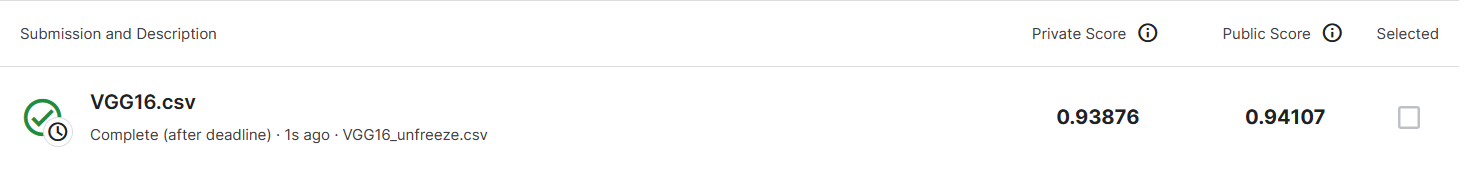

### VGG19

In [ ]:
base_dir = 'train_val_aug'
train_dir = os.path.join(base_dir, 'train') #resulf = directory
validation_dir = os.path.join(base_dir, 'val')

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1.0/255.)
# train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

# Train Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'sparse', target_size = (224, 224))

# Validation Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir,  batch_size = 20, class_mode = 'sparse', target_size = (224, 224))

# Test use flow from dataframe เพราะ เวลาส่งชื่อต้องเรียงตาม format เขา
test_generator = test_datagen.flow_from_dataframe(df_test, x_col='file_name', batch_size = 20, class_mode = None, target_size = (224, 224), shuffle=False)

In [ ]:
base_model = VGG19(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

base_model.trainable = False

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(128, activation='relu')(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(10, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

### **InceptionV3 93.15%**

**Data**

In [ ]:
base_dir = 'train_val_aug'
train_dir = os.path.join(base_dir, 'train') #resulf = directory
validation_dir = os.path.join(base_dir, 'val')

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1.0/255.)
# train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

# Train Flow training images in batches of 100 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 100, class_mode = 'sparse', target_size = (75, 75))

# Validation Flow validation images in batches of 100 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir,  batch_size = 100, class_mode = 'sparse', target_size = (75, 75))

# Test use flow from dataframe เพราะ เวลาส่งชื่อต้องเรียงตาม format เขา
test_generator = test_datagen.flow_from_dataframe(df_test, x_col='file_name', batch_size = 100, class_mode = None, target_size = (75, 75), shuffle=False)

Found 320008 images belonging to 10 classes.
Found 13395 images belonging to 10 classes.
Found 26032 validated image filenames.


**Model**

In [ ]:
base_model = InceptionV3(input_shape = (75, 75, 3), include_top = False, weights = 'imagenet')

for layer in tqdm(base_model.layers):
    layer.trainable = False

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(128, activation='relu')(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(10, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

100%|██████████| 311/311 [00:00<00:00, 33800.49it/s]


In [ ]:
!rm -rf IncepV3_Best

In [ ]:
checkpoint = ModelCheckpoint("IncepV3_Best", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='max') #5 ตัวไม่ดีขึ้นก็หยุด
Incephist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 1000, callbacks=[checkpoint,early])

Epoch 1/1000
100/100 [==============================] - ETA: 0s - loss: 1.9574 - acc: 0.2948
Epoch 1: val_acc improved from -inf to 0.47204, saving model to IncepV3_Best


100/100 [==============================] - 60s 552ms/step - loss: 1.9574 - acc: 0.2948 - val_loss: 1.5090 - val_acc: 0.4720
Epoch 2/1000
100/100 [==============================] - ETA: 0s - loss: 1.4995 - acc: 0.4745
Epoch 2: val_acc improved from 0.47204 to 0.54797, saving model to IncepV3_Best


100/100 [==============================] - 44s 439ms/step - loss: 1.4995 - acc: 0.4745 - val_loss: 1.2970 - val_acc: 0.5480
Epoch 3/1000
100/100 [==============================] - ETA: 0s - loss: 1.3250 - acc: 0.5388
Epoch 3: val_acc improved from 0.54797 to 0.58216, saving model to IncepV3_Best


100/100 [==============================] - 45s 451ms/step - loss: 1.3250 - acc: 0.5388 - val_loss: 1.2096 - val_acc: 0.5822
Epoch 4/1000
100/100 [==============================] - ETA: 0s - loss: 1.2514 - acc: 0.5619
Epoch 4: val_acc improved from 0.58216 to 0.61575, saving model to IncepV3_Best


100/100 [==============================] - 44s 444ms/step - loss: 1.2514 - acc: 0.5619 - val_loss: 1.1245 - val_acc: 0.6158
Epoch 5/1000
100/100 [==============================] - ETA: 0s - loss: 1.2146 - acc: 0.5805
Epoch 5: val_acc improved from 0.61575 to 0.62740, saving model to IncepV3_Best


100/100 [==============================] - 44s 441ms/step - loss: 1.2146 - acc: 0.5805 - val_loss: 1.0902 - val_acc: 0.6274
Epoch 6/1000
100/100 [==============================] - ETA: 0s - loss: 1.1834 - acc: 0.5835
Epoch 6: val_acc did not improve from 0.62740
100/100 [==============================] - 13s 127ms/step - loss: 1.1834 - acc: 0.5835 - val_loss: 1.1004 - val_acc: 0.6208
Epoch 7/1000
100/100 [==============================] - ETA: 0s - loss: 1.1461 - acc: 0.5962
Epoch 7: val_acc improved from 0.62740 to 0.63397, saving model to IncepV3_Best


100/100 [==============================] - 43s 438ms/step - loss: 1.1461 - acc: 0.5962 - val_loss: 1.0611 - val_acc: 0.6340
Epoch 8/1000
100/100 [==============================] - ETA: 0s - loss: 1.1302 - acc: 0.6072
Epoch 8: val_acc improved from 0.63397 to 0.64420, saving model to IncepV3_Best


100/100 [==============================] - 44s 439ms/step - loss: 1.1302 - acc: 0.6072 - val_loss: 1.0394 - val_acc: 0.6442
Epoch 9/1000
100/100 [==============================] - ETA: 0s - loss: 1.1013 - acc: 0.6159
Epoch 9: val_acc did not improve from 0.64420
100/100 [==============================] - 13s 127ms/step - loss: 1.1013 - acc: 0.6159 - val_loss: 1.0491 - val_acc: 0.6424
Epoch 10/1000
100/100 [==============================] - ETA: 0s - loss: 1.0962 - acc: 0.6190
Epoch 10: val_acc improved from 0.64420 to 0.64950, saving model to IncepV3_Best


100/100 [==============================] - 44s 440ms/step - loss: 1.0962 - acc: 0.6190 - val_loss: 1.0185 - val_acc: 0.6495
Epoch 11/1000
100/100 [==============================] - ETA: 0s - loss: 1.0782 - acc: 0.6304
Epoch 11: val_acc improved from 0.64950 to 0.65868, saving model to IncepV3_Best


100/100 [==============================] - 47s 473ms/step - loss: 1.0782 - acc: 0.6304 - val_loss: 1.0074 - val_acc: 0.6587
Epoch 12/1000
100/100 [==============================] - ETA: 0s - loss: 1.0435 - acc: 0.6362
Epoch 12: val_acc did not improve from 0.65868
100/100 [==============================] - 13s 127ms/step - loss: 1.0435 - acc: 0.6362 - val_loss: 1.0071 - val_acc: 0.6505
Epoch 13/1000
100/100 [==============================] - ETA: 0s - loss: 1.0415 - acc: 0.6408
Epoch 13: val_acc improved from 0.65868 to 0.66465, saving model to IncepV3_Best


100/100 [==============================] - 44s 442ms/step - loss: 1.0415 - acc: 0.6408 - val_loss: 0.9814 - val_acc: 0.6647
Epoch 14/1000
100/100 [==============================] - ETA: 0s - loss: 1.0241 - acc: 0.6462
Epoch 14: val_acc improved from 0.66465 to 0.66846, saving model to IncepV3_Best


100/100 [==============================] - 44s 441ms/step - loss: 1.0241 - acc: 0.6462 - val_loss: 0.9793 - val_acc: 0.6685
Epoch 15/1000
100/100 [==============================] - ETA: 0s - loss: 1.0044 - acc: 0.6554
Epoch 15: val_acc did not improve from 0.66846
100/100 [==============================] - 13s 129ms/step - loss: 1.0044 - acc: 0.6554 - val_loss: 0.9886 - val_acc: 0.6631
Epoch 16/1000
100/100 [==============================] - ETA: 0s - loss: 1.0095 - acc: 0.6508
Epoch 16: val_acc did not improve from 0.66846
100/100 [==============================] - 13s 128ms/step - loss: 1.0095 - acc: 0.6508 - val_loss: 0.9723 - val_acc: 0.6669
Epoch 17/1000
100/100 [==============================] - ETA: 0s - loss: 0.9834 - acc: 0.6598
Epoch 17: val_acc improved from 0.66846 to 0.67010, saving model to IncepV3_Best


100/100 [==============================] - 44s 439ms/step - loss: 0.9834 - acc: 0.6598 - val_loss: 0.9624 - val_acc: 0.6701
Epoch 18/1000
100/100 [==============================] - ETA: 0s - loss: 0.9868 - acc: 0.6571
Epoch 18: val_acc did not improve from 0.67010
100/100 [==============================] - 17s 172ms/step - loss: 0.9868 - acc: 0.6571 - val_loss: 0.9809 - val_acc: 0.6680
Epoch 19/1000
100/100 [==============================] - ETA: 0s - loss: 0.9863 - acc: 0.6612
Epoch 19: val_acc improved from 0.67010 to 0.68018, saving model to IncepV3_Best


100/100 [==============================] - 44s 444ms/step - loss: 0.9863 - acc: 0.6612 - val_loss: 0.9416 - val_acc: 0.6802
Epoch 20/1000
100/100 [==============================] - ETA: 0s - loss: 0.9720 - acc: 0.6674
Epoch 20: val_acc did not improve from 0.68018
100/100 [==============================] - 13s 127ms/step - loss: 0.9720 - acc: 0.6674 - val_loss: 0.9570 - val_acc: 0.6704
Epoch 21/1000
100/100 [==============================] - ETA: 0s - loss: 0.9710 - acc: 0.6670
Epoch 21: val_acc improved from 0.68018 to 0.68122, saving model to IncepV3_Best


100/100 [==============================] - 44s 439ms/step - loss: 0.9710 - acc: 0.6670 - val_loss: 0.9286 - val_acc: 0.6812
Epoch 22/1000
100/100 [==============================] - ETA: 0s - loss: 0.9360 - acc: 0.6793
Epoch 22: val_acc did not improve from 0.68122
100/100 [==============================] - 13s 127ms/step - loss: 0.9360 - acc: 0.6793 - val_loss: 0.9584 - val_acc: 0.6679
Epoch 23/1000
 99/100 [============================>.] - ETA: 0s - loss: 0.9310 - acc: 0.6781
Epoch 23: val_acc did not improve from 0.68122
100/100 [==============================] - 13s 128ms/step - loss: 0.9318 - acc: 0.6774 - val_loss: 0.9300 - val_acc: 0.6803
Epoch 24/1000
100/100 [==============================] - ETA: 0s - loss: 0.9377 - acc: 0.6762
Epoch 24: val_acc improved from 0.68122 to 0.68436, saving model to IncepV3_Best


100/100 [==============================] - 48s 484ms/step - loss: 0.9377 - acc: 0.6762 - val_loss: 0.9196 - val_acc: 0.6844
Epoch 25/1000
100/100 [==============================] - ETA: 0s - loss: 0.9299 - acc: 0.6862
Epoch 25: val_acc did not improve from 0.68436
100/100 [==============================] - 13s 127ms/step - loss: 0.9299 - acc: 0.6862 - val_loss: 0.9357 - val_acc: 0.6788
Epoch 26/1000
100/100 [==============================] - ETA: 0s - loss: 0.9310 - acc: 0.6780
Epoch 26: val_acc did not improve from 0.68436
100/100 [==============================] - 13s 126ms/step - loss: 0.9310 - acc: 0.6780 - val_loss: 0.9214 - val_acc: 0.6836
Epoch 27/1000
100/100 [==============================] - ETA: 0s - loss: 0.9074 - acc: 0.6830
Epoch 27: val_acc improved from 0.68436 to 0.68615, saving model to IncepV3_Best


100/100 [==============================] - 43s 435ms/step - loss: 0.9074 - acc: 0.6830 - val_loss: 0.9220 - val_acc: 0.6862
Epoch 28/1000
100/100 [==============================] - ETA: 0s - loss: 0.9004 - acc: 0.6878
Epoch 28: val_acc did not improve from 0.68615
100/100 [==============================] - 13s 127ms/step - loss: 0.9004 - acc: 0.6878 - val_loss: 0.9339 - val_acc: 0.6779
Epoch 29/1000
100/100 [==============================] - ETA: 0s - loss: 0.8854 - acc: 0.6966
Epoch 29: val_acc improved from 0.68615 to 0.68712, saving model to IncepV3_Best


100/100 [==============================] - 48s 483ms/step - loss: 0.8854 - acc: 0.6966 - val_loss: 0.9033 - val_acc: 0.6871
Epoch 30/1000
100/100 [==============================] - ETA: 0s - loss: 0.8990 - acc: 0.6911
Epoch 30: val_acc improved from 0.68712 to 0.68996, saving model to IncepV3_Best


100/100 [==============================] - 48s 479ms/step - loss: 0.8990 - acc: 0.6911 - val_loss: 0.9065 - val_acc: 0.6900
Epoch 31/1000
100/100 [==============================] - ETA: 0s - loss: 0.8995 - acc: 0.6906
Epoch 31: val_acc improved from 0.68996 to 0.69384, saving model to IncepV3_Best


100/100 [==============================] - 46s 461ms/step - loss: 0.8995 - acc: 0.6906 - val_loss: 0.9007 - val_acc: 0.6938
Epoch 32/1000
100/100 [==============================] - ETA: 0s - loss: 0.8669 - acc: 0.6984
Epoch 32: val_acc did not improve from 0.69384
100/100 [==============================] - 14s 137ms/step - loss: 0.8669 - acc: 0.6984 - val_loss: 0.9021 - val_acc: 0.6934
Epoch 33/1000
100/100 [==============================] - ETA: 0s - loss: 0.8604 - acc: 0.7042
Epoch 33: val_acc did not improve from 0.69384
100/100 [==============================] - 14s 138ms/step - loss: 0.8604 - acc: 0.7042 - val_loss: 0.9099 - val_acc: 0.6908
Epoch 34/1000
100/100 [==============================] - ETA: 0s - loss: 0.8545 - acc: 0.7035
Epoch 34: val_acc did not improve from 0.69384
100/100 [==============================] - 13s 132ms/step - loss: 0.8545 - acc: 0.7035 - val_loss: 0.9046 - val_acc: 0.6912
Epoch 35/1000
100/100 [==============================] - ETA: 0s - loss: 0.8669 -

In [ ]:
model_best = keras.models.load_model('/content/IncepV3_Best')

pred = model_best.predict(test_generator)
pred = np.argmax(pred, axis=1)

sub = df_test[['imageid_boxid', 'class']].copy()
sub['class'] = pred
sub.to_csv('InceptionV3.csv', index=False)
!kaggle competitions submit -c hackathon-online-2022-image-processing -f 'InceptionV3.csv'  -m 'InceptionV3_Unfreeze.csv'

261/261 [==============================] - 21s 74ms/step
100% 233k/233k [00:01<00:00, 181kB/s]
Successfully submitted to Hackathon Online: Image Processing

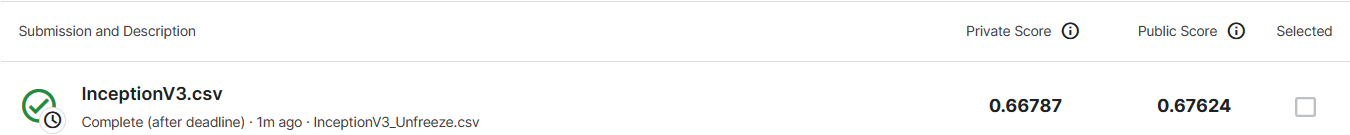

**FineTune**

In [ ]:
# Unfreeze the base model
base_model.trainable = True

#Everytime you Unfreeze call compile please
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

Incephist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 1000, callbacks=[checkpoint,early])

Epoch 1/1000
100/100 [==============================] - ETA: 0s - loss: 1.8345 - acc: 0.3457
Epoch 1: val_acc did not improve from 0.69384
100/100 [==============================] - 26s 182ms/step - loss: 1.8345 - acc: 0.3457 - val_loss: 1.5416 - val_acc: 0.4652
Epoch 2/1000
100/100 [==============================] - ETA: 0s - loss: 1.0386 - acc: 0.6442
Epoch 2: val_acc improved from 0.69384 to 0.72191, saving model to IncepV3_Best


100/100 [==============================] - 66s 667ms/step - loss: 1.0386 - acc: 0.6442 - val_loss: 0.8641 - val_acc: 0.7219
Epoch 3/1000
100/100 [==============================] - ETA: 0s - loss: 0.7505 - acc: 0.7514
Epoch 3: val_acc improved from 0.72191 to 0.80022, saving model to IncepV3_Best


100/100 [==============================] - 68s 683ms/step - loss: 0.7505 - acc: 0.7514 - val_loss: 0.7931 - val_acc: 0.8002
Epoch 4/1000
100/100 [==============================] - ETA: 0s - loss: 0.5701 - acc: 0.8198
Epoch 4: val_acc improved from 0.80022 to 0.83927, saving model to IncepV3_Best


100/100 [==============================] - 64s 641ms/step - loss: 0.5701 - acc: 0.8198 - val_loss: 0.5273 - val_acc: 0.8393
Epoch 5/1000
100/100 [==============================] - ETA: 0s - loss: 0.4875 - acc: 0.8510
Epoch 5: val_acc improved from 0.83927 to 0.86010, saving model to IncepV3_Best


100/100 [==============================] - 62s 622ms/step - loss: 0.4875 - acc: 0.8510 - val_loss: 0.4741 - val_acc: 0.8601
Epoch 6/1000
100/100 [==============================] - ETA: 0s - loss: 0.4395 - acc: 0.8661
Epoch 6: val_acc improved from 0.86010 to 0.87376, saving model to IncepV3_Best


100/100 [==============================] - 51s 517ms/step - loss: 0.4395 - acc: 0.8661 - val_loss: 0.4582 - val_acc: 0.8738
Epoch 7/1000
100/100 [==============================] - ETA: 0s - loss: 0.3902 - acc: 0.8839
Epoch 7: val_acc improved from 0.87376 to 0.88996, saving model to IncepV3_Best


100/100 [==============================] - 53s 532ms/step - loss: 0.3902 - acc: 0.8839 - val_loss: 0.3865 - val_acc: 0.8900
Epoch 8/1000
100/100 [==============================] - ETA: 0s - loss: 0.3476 - acc: 0.8976
Epoch 8: val_acc improved from 0.88996 to 0.89854, saving model to IncepV3_Best


100/100 [==============================] - 51s 516ms/step - loss: 0.3476 - acc: 0.8976 - val_loss: 0.3508 - val_acc: 0.8985
Epoch 9/1000
100/100 [==============================] - ETA: 0s - loss: 0.3310 - acc: 0.9017
Epoch 9: val_acc improved from 0.89854 to 0.90310, saving model to IncepV3_Best


100/100 [==============================] - 51s 516ms/step - loss: 0.3310 - acc: 0.9017 - val_loss: 0.3298 - val_acc: 0.9031
Epoch 10/1000
100/100 [==============================] - ETA: 0s - loss: 0.2928 - acc: 0.9144
Epoch 10: val_acc did not improve from 0.90310
100/100 [==============================] - 17s 166ms/step - loss: 0.2928 - acc: 0.9144 - val_loss: 0.3365 - val_acc: 0.9000
Epoch 11/1000
100/100 [==============================] - ETA: 0s - loss: 0.2814 - acc: 0.9165
Epoch 11: val_acc improved from 0.90310 to 0.90832, saving model to IncepV3_Best


100/100 [==============================] - 56s 560ms/step - loss: 0.2814 - acc: 0.9165 - val_loss: 0.3221 - val_acc: 0.9083
Epoch 12/1000
100/100 [==============================] - ETA: 0s - loss: 0.2815 - acc: 0.9204
Epoch 12: val_acc improved from 0.90832 to 0.91064, saving model to IncepV3_Best


100/100 [==============================] - 51s 510ms/step - loss: 0.2815 - acc: 0.9204 - val_loss: 0.3161 - val_acc: 0.9106
Epoch 13/1000
100/100 [==============================] - ETA: 0s - loss: 0.2645 - acc: 0.9209
Epoch 13: val_acc improved from 0.91064 to 0.91482, saving model to IncepV3_Best


100/100 [==============================] - 52s 525ms/step - loss: 0.2645 - acc: 0.9209 - val_loss: 0.3195 - val_acc: 0.9148
Epoch 14/1000
100/100 [==============================] - ETA: 0s - loss: 0.2494 - acc: 0.9295
Epoch 14: val_acc improved from 0.91482 to 0.92072, saving model to IncepV3_Best


100/100 [==============================] - 51s 513ms/step - loss: 0.2494 - acc: 0.9295 - val_loss: 0.2839 - val_acc: 0.9207
Epoch 15/1000
100/100 [==============================] - ETA: 0s - loss: 0.2395 - acc: 0.9307
Epoch 15: val_acc did not improve from 0.92072
100/100 [==============================] - 17s 165ms/step - loss: 0.2395 - acc: 0.9307 - val_loss: 0.2885 - val_acc: 0.9207
Epoch 16/1000
100/100 [==============================] - ETA: 0s - loss: 0.2404 - acc: 0.9309
Epoch 16: val_acc did not improve from 0.92072
100/100 [==============================] - 18s 174ms/step - loss: 0.2404 - acc: 0.9309 - val_loss: 0.3592 - val_acc: 0.8990
Epoch 17/1000
100/100 [==============================] - ETA: 0s - loss: 0.2191 - acc: 0.9378
Epoch 17: val_acc improved from 0.92072 to 0.92206, saving model to IncepV3_Best


100/100 [==============================] - 51s 516ms/step - loss: 0.2191 - acc: 0.9378 - val_loss: 0.2827 - val_acc: 0.9221
Epoch 18/1000
100/100 [==============================] - ETA: 0s - loss: 0.2344 - acc: 0.9331
Epoch 18: val_acc improved from 0.92206 to 0.92340, saving model to IncepV3_Best


100/100 [==============================] - 51s 514ms/step - loss: 0.2344 - acc: 0.9331 - val_loss: 0.2741 - val_acc: 0.9234
Epoch 19/1000
100/100 [==============================] - ETA: 0s - loss: 0.1925 - acc: 0.9458
Epoch 19: val_acc did not improve from 0.92340
100/100 [==============================] - 17s 168ms/step - loss: 0.1925 - acc: 0.9458 - val_loss: 0.2768 - val_acc: 0.9233
Epoch 20/1000
100/100 [==============================] - ETA: 0s - loss: 0.1956 - acc: 0.9425
Epoch 20: val_acc did not improve from 0.92340
100/100 [==============================] - 17s 167ms/step - loss: 0.1956 - acc: 0.9425 - val_loss: 0.2848 - val_acc: 0.9230
Epoch 21/1000
100/100 [==============================] - ETA: 0s - loss: 0.2023 - acc: 0.9457
Epoch 21: val_acc improved from 0.92340 to 0.92833, saving model to IncepV3_Best


100/100 [==============================] - 55s 553ms/step - loss: 0.2023 - acc: 0.9457 - val_loss: 0.2691 - val_acc: 0.9283
Epoch 22/1000
100/100 [==============================] - ETA: 0s - loss: 0.1749 - acc: 0.9481
Epoch 22: val_acc did not improve from 0.92833
100/100 [==============================] - 17s 165ms/step - loss: 0.1749 - acc: 0.9481 - val_loss: 0.2784 - val_acc: 0.9235
Epoch 23/1000
100/100 [==============================] - ETA: 0s - loss: 0.1873 - acc: 0.9457
Epoch 23: val_acc improved from 0.92833 to 0.92893, saving model to IncepV3_Best


100/100 [==============================] - 52s 519ms/step - loss: 0.1873 - acc: 0.9457 - val_loss: 0.2658 - val_acc: 0.9289
Epoch 24/1000
100/100 [==============================] - ETA: 0s - loss: 0.1704 - acc: 0.9504
Epoch 24: val_acc did not improve from 0.92893
100/100 [==============================] - 17s 166ms/step - loss: 0.1704 - acc: 0.9504 - val_loss: 0.2850 - val_acc: 0.9247
Epoch 25/1000
100/100 [==============================] - ETA: 0s - loss: 0.1571 - acc: 0.9539
Epoch 25: val_acc did not improve from 0.92893
100/100 [==============================] - 17s 166ms/step - loss: 0.1571 - acc: 0.9539 - val_loss: 0.2745 - val_acc: 0.9270
Epoch 26/1000
100/100 [==============================] - ETA: 0s - loss: 0.1724 - acc: 0.9518
Epoch 26: val_acc improved from 0.92893 to 0.93132, saving model to IncepV3_Best


100/100 [==============================] - 52s 520ms/step - loss: 0.1724 - acc: 0.9518 - val_loss: 0.2604 - val_acc: 0.9313
Epoch 27/1000
100/100 [==============================] - ETA: 0s - loss: 0.1680 - acc: 0.9511
Epoch 27: val_acc did not improve from 0.93132
100/100 [==============================] - 16s 164ms/step - loss: 0.1680 - acc: 0.9511 - val_loss: 0.2685 - val_acc: 0.9285
Epoch 28/1000
100/100 [==============================] - ETA: 0s - loss: 0.1531 - acc: 0.9572
Epoch 28: val_acc improved from 0.93132 to 0.93221, saving model to IncepV3_Best


100/100 [==============================] - 55s 555ms/step - loss: 0.1531 - acc: 0.9572 - val_loss: 0.2578 - val_acc: 0.9322
Epoch 29/1000
100/100 [==============================] - ETA: 0s - loss: 0.1481 - acc: 0.9576
Epoch 29: val_acc did not improve from 0.93221
100/100 [==============================] - 16s 163ms/step - loss: 0.1481 - acc: 0.9576 - val_loss: 0.2713 - val_acc: 0.9300
Epoch 30/1000
100/100 [==============================] - ETA: 0s - loss: 0.1558 - acc: 0.9588
Epoch 30: val_acc did not improve from 0.93221
100/100 [==============================] - 17s 165ms/step - loss: 0.1558 - acc: 0.9588 - val_loss: 0.2801 - val_acc: 0.9283
Epoch 31/1000
100/100 [==============================] - ETA: 0s - loss: 0.1369 - acc: 0.9606
Epoch 31: val_acc did not improve from 0.93221
100/100 [==============================] - 16s 164ms/step - loss: 0.1369 - acc: 0.9606 - val_loss: 0.2703 - val_acc: 0.9306
Epoch 32/1000
100/100 [==============================] - ETA: 0s - loss: 0.1403 -

In [ ]:
model_best = keras.models.load_model('/content/IncepV3_Best')

pred = model_best.predict(test_generator)
pred = np.argmax(pred, axis=1)

sub = df_test[['imageid_boxid', 'class']].copy()
sub['class'] = pred
sub.to_csv('InceptionV3.csv', index=False)
!kaggle competitions submit -c hackathon-online-2022-image-processing -f 'InceptionV3.csv'  -m 'InceptionV3_Freeze.csv'

261/261 [==============================] - 25s 92ms/step
100% 233k/233k [00:01<00:00, 178kB/s]
Successfully submitted to Hackathon Online: Image Processing

In [ ]:
!zip -r -q '/content/drive/MyDrive/Colab Notebooks/SuperAi/Pracetice/Image Processing/IncepV3_Best.zip' /content/IncepV3_Best

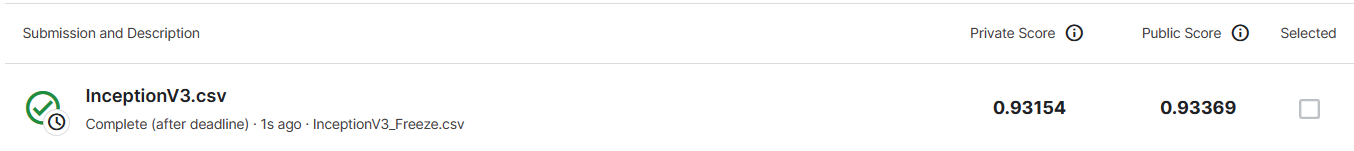

### ResNet50

**Data**

In [ ]:
base_dir = 'train_val_aug'
train_dir = os.path.join(base_dir, 'train') #resulf = directory
validation_dir = os.path.join(base_dir, 'val')

# Add our data-augmentation parameters to ImageDataGenerator
# train_datagen = ImageDataGenerator(rescale = 1.0/255.)
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = False)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

# Train Flow training images in batches of 300 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 300, class_mode = 'sparse', target_size = (32, 32))

# Validation Flow validation images in batches of 300 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir,  batch_size = 300, class_mode = 'sparse', target_size = (32, 32))

# Test use flow from dataframe เพราะ เวลาส่งชื่อต้องเรียงตาม format เขา
test_generator = test_datagen.flow_from_dataframe(df_test, x_col='file_name', batch_size = 300, class_mode = None, target_size = (32, 32), shuffle=False)

Found 320008 images belonging to 10 classes.
Found 13395 images belonging to 10 classes.
Found 26032 validated image filenames.


**Model**

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

#call ResNet50
base_model = ResNet50(input_shape=(32, 32, 3), include_top=False, weights="imagenet")

# Freeze the base model
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten(name="flatten")(x)
x = Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
x = Dense(10, activation="softmax")(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=x)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [ ]:
checkpoint = ModelCheckpoint("ResNet50_Best", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='max') #5 ตัวไม่ดีขึ้นก็หยุด
resnet_history = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 1000, callbacks=[checkpoint,early])

Epoch 1/1000
100/100 [==============================] - 49s 456ms/step - loss: 3.2884 - acc: 0.1040 - val_loss: 2.3401 - val_acc: 0.1012

Epoch 00001: val_acc improved from -inf to 0.10123, saving model to ResNet50_Best


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/1000
100/100 [==============================] - 41s 415ms/step - loss: 2.7423 - acc: 0.0978 - val_loss: 2.3167 - val_acc: 0.1290

Epoch 00002: val_acc improved from 0.10123 to 0.12900, saving model to ResNet50_Best


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 3/1000
100/100 [==============================] - 40s 403ms/step - loss: 2.6183 - acc: 0.1023 - val_loss: 2.3024 - val_acc: 0.1690

Epoch 00003: val_acc improved from 0.12900 to 0.16902, saving model to ResNet50_Best


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 4/1000
100/100 [==============================] - 40s 400ms/step - loss: 2.5639 - acc: 0.0993 - val_loss: 2.2896 - val_acc: 0.1722

Epoch 00004: val_acc improved from 0.16902 to 0.17215, saving model to ResNet50_Best


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 5/1000
100/100 [==============================] - 40s 403ms/step - loss: 2.5182 - acc: 0.1003 - val_loss: 2.2829 - val_acc: 0.1815

Epoch 00005: val_acc improved from 0.17215 to 0.18149, saving model to ResNet50_Best


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 6/1000
100/100 [==============================] - 40s 404ms/step - loss: 2.4799 - acc: 0.1012 - val_loss: 2.2780 - val_acc: 0.1827

Epoch 00006: val_acc improved from 0.18149 to 0.18268, saving model to ResNet50_Best


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 7/1000
100/100 [==============================] - 38s 379ms/step - loss: 2.4466 - acc: 0.1030 - val_loss: 2.2750 - val_acc: 0.1892

Epoch 00007: val_acc improved from 0.18268 to 0.18918, saving model to ResNet50_Best


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 8/1000
100/100 [==============================] - 38s 380ms/step - loss: 2.4203 - acc: 0.1033 - val_loss: 2.2703 - val_acc: 0.1940

Epoch 00008: val_acc improved from 0.18918 to 0.19395, saving model to ResNet50_Best


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 9/1000
100/100 [==============================] - 37s 375ms/step - loss: 2.4071 - acc: 0.1005 - val_loss: 2.2654 - val_acc: 0.1969

Epoch 00009: val_acc improved from 0.19395 to 0.19694, saving model to ResNet50_Best


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 10/1000
100/100 [==============================] - 36s 362ms/step - loss: 2.3898 - acc: 0.1050 - val_loss: 2.2652 - val_acc: 0.1995

Epoch 00010: val_acc improved from 0.19694 to 0.19948, saving model to ResNet50_Best


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 11/1000
100/100 [==============================] - 35s 347ms/step - loss: 2.3733 - acc: 0.1050 - val_loss: 2.2636 - val_acc: 0.2047

Epoch 00011: val_acc improved from 0.19948 to 0.20470, saving model to ResNet50_Best


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 12/1000
100/100 [==============================] - 36s 356ms/step - loss: 2.3652 - acc: 0.1035 - val_loss: 2.2625 - val_acc: 0.2080

Epoch 00012: val_acc improved from 0.20470 to 0.20799, saving model to ResNet50_Best


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 13/1000
100/100 [==============================] - 33s 331ms/step - loss: 2.3542 - acc: 0.1036 - val_loss: 2.2630 - val_acc: 0.2184

Epoch 00013: val_acc improved from 0.20799 to 0.21844, saving model to ResNet50_Best


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 14/1000
100/100 [==============================] - 35s 355ms/step - loss: 2.3434 - acc: 0.1069 - val_loss: 2.2611 - val_acc: 0.2314

Epoch 00014: val_acc improved from 0.21844 to 0.23135, saving model to ResNet50_Best


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 15/1000
100/100 [==============================] - 32s 323ms/step - loss: 2.3388 - acc: 0.1099 - val_loss: 2.2627 - val_acc: 0.2264

Epoch 00015: val_acc did not improve from 0.23135
Epoch 16/1000
100/100 [==============================] - 32s 321ms/step - loss: 2.3344 - acc: 0.1079 - val_loss: 2.2617 - val_acc: 0.2343

Epoch 00016: val_acc improved from 0.23135 to 0.23427, saving model to ResNet50_Best


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 17/1000
100/100 [==============================] - 33s 333ms/step - loss: 2.3269 - acc: 0.1090 - val_loss: 2.2629 - val_acc: 0.2256

Epoch 00017: val_acc did not improve from 0.23427
Epoch 18/1000
100/100 [==============================] - 32s 318ms/step - loss: 2.3246 - acc: 0.1099 - val_loss: 2.2607 - val_acc: 0.2264

Epoch 00018: val_acc did not improve from 0.23427
Epoch 19/1000
100/100 [==============================] - 32s 314ms/step - loss: 2.3144 - acc: 0.1166 - val_loss: 2.2600 - val_acc: 0.2347

Epoch 00019: val_acc improved from 0.23427 to 0.23471, saving model to ResNet50_Best


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 20/1000
100/100 [==============================] - 34s 335ms/step - loss: 2.3176 - acc: 0.1133 - val_loss: 2.2611 - val_acc: 0.2287

Epoch 00020: val_acc did not improve from 0.23471
Epoch 21/1000
100/100 [==============================] - 31s 313ms/step - loss: 2.3100 - acc: 0.1117 - val_loss: 2.2614 - val_acc: 0.2069

Epoch 00021: val_acc did not improve from 0.23471
Epoch 22/1000
100/100 [==============================] - 33s 332ms/step - loss: 2.3076 - acc: 0.1151 - val_loss: 2.2583 - val_acc: 0.2360

Epoch 00022: val_acc improved from 0.23471 to 0.23598, saving model to ResNet50_Best


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 23/1000
100/100 [==============================] - 31s 307ms/step - loss: 2.3094 - acc: 0.1159 - val_loss: 2.2552 - val_acc: 0.2464

Epoch 00023: val_acc improved from 0.23598 to 0.24644, saving model to ResNet50_Best


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 24/1000
100/100 [==============================] - 31s 305ms/step - loss: 2.3036 - acc: 0.1176 - val_loss: 2.2549 - val_acc: 0.2298

Epoch 00024: val_acc did not improve from 0.24644
Epoch 25/1000
100/100 [==============================] - 33s 333ms/step - loss: 2.3035 - acc: 0.1168 - val_loss: 2.2535 - val_acc: 0.2458

Epoch 00025: val_acc did not improve from 0.24644
Epoch 26/1000
100/100 [==============================] - 30s 302ms/step - loss: 2.3017 - acc: 0.1178 - val_loss: 2.2537 - val_acc: 0.2385

Epoch 00026: val_acc did not improve from 0.24644
Epoch 27/1000
100/100 [==============================] - 33s 326ms/step - loss: 2.2970 - acc: 0.1248 - val_loss: 2.2517 - val_acc: 0.2410

Epoch 00027: val_acc did not improve from 0.24644
Epoch 28/1000
100/100 [==============================] - 30s 300ms/step - loss: 2.2950 - acc: 0.1248 - val_loss: 2.2480 - val_acc: 0.2609

Epoch 00028: val_acc improved from 0.24644 to 0.26092, saving model to ResNet50_Best


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 29/1000
100/100 [==============================] - 30s 300ms/step - loss: 2.2974 - acc: 0.1209 - val_loss: 2.2487 - val_acc: 0.2487

Epoch 00029: val_acc did not improve from 0.26092
Epoch 30/1000
100/100 [==============================] - 33s 327ms/step - loss: 2.2950 - acc: 0.1231 - val_loss: 2.2480 - val_acc: 0.2589

Epoch 00030: val_acc did not improve from 0.26092
Epoch 31/1000
100/100 [==============================] - 32s 317ms/step - loss: 2.2933 - acc: 0.1273 - val_loss: 2.2473 - val_acc: 0.2591

Epoch 00031: val_acc did not improve from 0.26092
Epoch 32/1000
100/100 [==============================] - 30s 295ms/step - loss: 2.2925 - acc: 0.1282 - val_loss: 2.2460 - val_acc: 0.2705

Epoch 00032: val_acc improved from 0.26092 to 0.27055, saving model to ResNet50_Best


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 33/1000
100/100 [==============================] - 30s 296ms/step - loss: 2.2918 - acc: 0.1288 - val_loss: 2.2442 - val_acc: 0.2773

Epoch 00033: val_acc improved from 0.27055 to 0.27727, saving model to ResNet50_Best


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 34/1000
100/100 [==============================] - 33s 328ms/step - loss: 2.2892 - acc: 0.1307 - val_loss: 2.2424 - val_acc: 0.2800

Epoch 00034: val_acc improved from 0.27727 to 0.27996, saving model to ResNet50_Best


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 35/1000
100/100 [==============================] - 32s 317ms/step - loss: 2.2883 - acc: 0.1275 - val_loss: 2.2413 - val_acc: 0.2736

Epoch 00035: val_acc did not improve from 0.27996
Epoch 36/1000
100/100 [==============================] - 30s 305ms/step - loss: 2.2878 - acc: 0.1322 - val_loss: 2.2390 - val_acc: 0.2786

Epoch 00036: val_acc did not improve from 0.27996
Epoch 37/1000
100/100 [==============================] - 30s 296ms/step - loss: 2.2887 - acc: 0.1303 - val_loss: 2.2384 - val_acc: 0.2821

Epoch 00037: val_acc improved from 0.27996 to 0.28212, saving model to ResNet50_Best


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 38/1000
100/100 [==============================] - 30s 298ms/step - loss: 2.2868 - acc: 0.1329 - val_loss: 2.2377 - val_acc: 0.2811

Epoch 00038: val_acc did not improve from 0.28212
Epoch 39/1000
100/100 [==============================] - 32s 323ms/step - loss: 2.2883 - acc: 0.1283 - val_loss: 2.2396 - val_acc: 0.2723

Epoch 00039: val_acc did not improve from 0.28212
Epoch 40/1000
100/100 [==============================] - 32s 318ms/step - loss: 2.2852 - acc: 0.1333 - val_loss: 2.2382 - val_acc: 0.2862

Epoch 00040: val_acc improved from 0.28212 to 0.28615, saving model to ResNet50_Best


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 41/1000
100/100 [==============================] - 30s 296ms/step - loss: 2.2844 - acc: 0.1349 - val_loss: 2.2381 - val_acc: 0.2790

Epoch 00041: val_acc did not improve from 0.28615
Epoch 42/1000
100/100 [==============================] - 36s 361ms/step - loss: 2.2857 - acc: 0.1333 - val_loss: 2.2389 - val_acc: 0.2677

Epoch 00042: val_acc did not improve from 0.28615
Epoch 43/1000
100/100 [==============================] - 30s 296ms/step - loss: 2.2840 - acc: 0.1356 - val_loss: 2.2381 - val_acc: 0.2705

Epoch 00043: val_acc did not improve from 0.28615
Epoch 44/1000
100/100 [==============================] - 30s 303ms/step - loss: 2.2827 - acc: 0.1348 - val_loss: 2.2367 - val_acc: 0.2710

Epoch 00044: val_acc did not improve from 0.28615
Epoch 45/1000
100/100 [==============================] - 29s 293ms/step - loss: 2.2826 - acc: 0.1370 - val_loss: 2.2384 - val_acc: 0.2652

Epoch 00045: val_acc did not improve from 0.28615
Epoch 00045: early stopping


In [ ]:
# Freeze the base model
base_model.trainable = False

from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(10, activation='sigmoid'))

In [ ]:
# base_model.compile(optimizer = tf.keras.optimizers.SGD(), loss = tf.keras.losses.sparse_categorical_crossentropy(), metrics = ['acc'])
base_model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [ ]:
!rm -rf ResNet50_Best

In [ ]:
model_best = keras.models.load_model('ResNet50_Best')

pred = model_best.predict(test_generator)
pred = np.argmax(pred, axis=1)

sub = df_test[['imageid_boxid', 'class']].copy()
sub['class'] = pred
sub.to_csv('ResNet50.csv', index=False)
!kaggle competitions submit -c hackathon-online-2022-image-processing -f 'ResNet50.csv'  -m 'ResNet50_Freeze.csv'

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


**Fine Tune**

In [ ]:
# Unfreeze the base model
base_model.trainable = True

#Everytime you Unfreeze call compile please
model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

resnet_history = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 1000, callbacks=[checkpoint,early])

/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/1000
100/100 [==============================] - 38s 345ms/step - loss: 3.7745 - acc: 0.1006 - val_loss: 4.0438 - val_acc: 0.0930

Epoch 00001: val_acc did not improve from 0.28615
Epoch 2/1000
100/100 [==============================] - 31s 306ms/step - loss: 3.5346 - acc: 0.1003 - val_loss: 13.9018 - val_acc: 0.1760

Epoch 00002: val_acc did not improve from 0.28615
Epoch 3/1000
100/100 [==============================] - 30s 300ms/step - loss: 3.3260 - acc: 0.1065 - val_loss: 107.5515 - val_acc: 0.1874

Epoch 00003: val_acc did not improve from 0.28615
Epoch 4/1000
100/100 [==============================] - 30s 301ms/step - loss: 3.1587 - acc: 0.1043 - val_loss: 168.7744 - val_acc: 0.1891

Epoch 00004: val_acc did not improve from 0.28615
Epoch 5/1000
100/100 [==============================] - 34s 335ms/step - loss: 2.9511 - acc: 0.1075 - val_loss: 130.3514 - val_acc: 0.1907

Epoch 00005: val_acc did not improve from 0.28615
Epoch 6/1000
100/100 [==============================]

In [ ]:
model_best = keras.models.load_model('ResNet50_Best')

pred = model_best.predict(test_generator)
pred = np.argmax(pred, axis=1)

sub = df_test[['imageid_boxid', 'class']].copy()
sub['class'] = pred
sub.to_csv('ResNet50.csv', index=False)
!kaggle competitions submit -c hackathon-online-2022-image-processing -f 'ResNet50.csv'  -m 'ResNet50_Unfreeze.csv'

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


### EfficientNet 94.13%

**Data**

In [ ]:
#batch_size 20 because Colab Pro Plus
base_dir = 'train_val_aug'
train_dir = os.path.join(base_dir, 'train') #resulf = directory
validation_dir = os.path.join(base_dir, 'val')

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1.0/255.)
# train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = False)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

# Train Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'sparse', target_size = (224, 224))

# Validation Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir,  batch_size = 20, class_mode = 'sparse', target_size = (224, 224))

# Test use flow from dataframe เพราะ เวลาส่งชื่อต้องเรียงตาม format เขา
test_generator = test_datagen.flow_from_dataframe(df_test, x_col='file_name', batch_size = 20, class_mode = None, target_size = (224, 224), shuffle=False)

Found 260042 images belonging to 10 classes.
Found 13480 images belonging to 10 classes.
Found 26032 validated image filenames.


**Model**

In [ ]:
# Rebuild top
x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
x = layers.BatchNormalization()(x)

top_dropout_rate = 0.2
x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

# Compile
model = tf.keras.Model(inputs, outputs, name="EfficientNet")
model.compile(tf.keras.optimizers.Adam(learning_rate=1e-2), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
#Call EFF
base_model = efficientnet.keras.EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

# Unfreeze the base model
base_model.trainable = False

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.4)(x)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.4)(x)

# Add a final sigmoid layer with ... node for classification output
x = layers.Dense(10, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

#อย่าลืมเปลี่ยน loss ให้เหมาะกับงาน แต่คิดว่าแค่ตัวนี้ก็เพียงพอ
model.compile(tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
!rm -rf EFF_best

checkpoint = ModelCheckpoint("EFF_best", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=2, verbose=1, mode='max') #2 ตัวไม่ดีขึ้นก็หยุด
eff_history = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 1000, callbacks=[checkpoint,early], verbose=2)

Epoch 1/1000

Epoch 1: val_accuracy improved from -inf to 0.07567, saving model to EFF_best


100/100 - 329s - loss: 7.1947 - accuracy: 0.0965 - val_loss: 2.7965 - val_accuracy: 0.0757 - 329s/epoch - 3s/step
Epoch 2/1000

Epoch 2: val_accuracy improved from 0.07567 to 0.07656, saving model to EFF_best


100/100 - 503s - loss: 5.1347 - accuracy: 0.0975 - val_loss: 2.7500 - val_accuracy: 0.0766 - 503s/epoch - 5s/step
Epoch 3/1000


KeyboardInterrupt: ignored

In [ ]:
model_best = keras.models.load_model('EFF_best')

pred = model_best.predict(test_generator)
pred = np.argmax(pred, axis=1)

sub = df_test[['imageid_boxid', 'class']].copy()
sub['class'] = pred
sub.to_csv('Eff.csv', index=False)
!kaggle competitions submit -c hackathon-online-2022-image-processing -f 'Eff.csv'  -m 'Eff_Freeze.csv'

22/22 [==============================] - 13s 372ms/step
100% 233k/233k [00:01<00:00, 168kB/s]
Successfully submitted to Hackathon Online: Image Processing

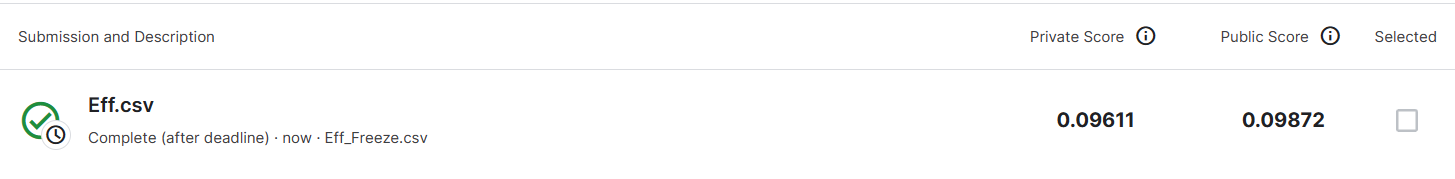

**Fine tune**

In [ ]:
# Make sure you have frozen the correct layers
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

In [ ]:
# # Unfreeze the base model
# base_model.trainable = True

for layer in base_model.layers[-200:]:
  if not isinstance(layer, layers.BatchNormalization):
    layer.trainable = True

#Everytime you Unfreeze call compile please
model.compile(tf.keras.optimizers.Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.compile(tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

eff_history = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 1000, callbacks=[checkpoint,early])

Epoch 1/1000


KeyboardInterrupt: ignored

In [ ]:
# Make sure you have frozen the correct layers
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

In [ ]:
model_best = keras.models.load_model('EFF_best')

pred = model_best.predict(test_generator)
pred = np.argmax(pred, axis=1)

sub = df_test[['imageid_boxid', 'class']].copy()
sub['class'] = pred
sub.to_csv('Eff.csv', index=False)
!kaggle competitions submit -c hackathon-online-2022-image-processing -f 'Eff.csv'  -m 'Eff_Unfreeze.csv'

22/22 [==============================] - 12s 321ms/step
100% 233k/233k [00:02<00:00, 92.7kB/s]
Successfully submitted to Hackathon Online: Image Processing

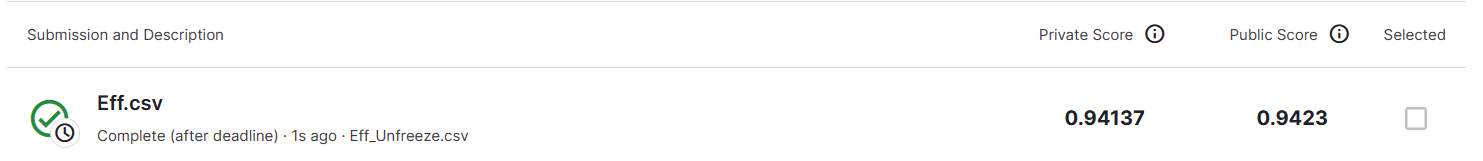